In [ ]:
import zipfile
import os

zip_path = "archive.zip"
extract_dir = "/content/dataset"

os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"Archive: {extract_dir}")


Archive: /content/dataset


In [ ]:
print("Extracted root directory content:")
for item in os.listdir(extract_dir):
    print("-", item)


Extracted root directory content:
- flowers


In [ ]:
base_dir = "/content/dataset/flowers"

classes = [folder for folder in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, folder))]
print(f"Number of classes: {len(classes)}")
print("Classes:", classes)

Number of classes: 5
Classes: ['tulip', 'daisy', 'sunflower', 'dandelion', 'rose']


In [ ]:
import shutil
import random

train_dir = "/content/data/train"
val_dir = "/content/data/val"
test_dir = "/content/data/test"

for dir_path in [train_dir, val_dir, test_dir]:
    os.makedirs(dir_path, exist_ok=True)
    for class_name in classes:
        os.makedirs(os.path.join(dir_path, class_name), exist_ok=True)

split_ratios = (0.7, 0.15, 0.15)

for class_name in classes:
    class_path = os.path.join(base_dir, class_name)
    images = os.listdir(class_path)
    random.shuffle(images)

    n_total = len(images)
    n_train = int(n_total * split_ratios[0])
    n_val = int(n_total * split_ratios[1])

    train_images = images[:n_train]
    val_images = images[n_train:n_train + n_val]
    test_images = images[n_train + n_val:]

    for image in train_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(train_dir, class_name, image))
    for image in val_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(val_dir, class_name, image))
    for image in test_images:
        shutil.copy(os.path.join(class_path, image), os.path.join(test_dir, class_name, image))

print("Train/validation/test split completed.")


Train/validation/test split completed.


In [ ]:
def count_images_in_dir(base_path):
    class_counts = {}
    for class_name in os.listdir(base_path):
        class_path = os.path.join(base_path, class_name)
        if os.path.isdir(class_path):
            count = len(os.listdir(class_path))
            class_counts[class_name] = count
    return class_counts

print("\nTrain set:")
print(count_images_in_dir(train_dir))

print("\nValidation set:")
print(count_images_in_dir(val_dir))

print("\nTest set:")
print(count_images_in_dir(test_dir))



Train set:
{'tulip': 688, 'daisy': 534, 'sunflower': 513, 'dandelion': 736, 'rose': 548}

Validation set:
{'tulip': 147, 'daisy': 114, 'sunflower': 109, 'dandelion': 157, 'rose': 117}

Test set:
{'tulip': 149, 'daisy': 116, 'sunflower': 111, 'dandelion': 159, 'rose': 119}


In [ ]:
from PIL import Image

sample_image_path = os.path.join(train_dir, classes[0], os.listdir(os.path.join(train_dir, classes[0]))[0])
image = Image.open(sample_image_path)

print("Image format:", image.format)
print("Image mode:", image.mode)
print("Image size:", image.size)

Image format: JPEG
Image mode: RGB
Image size: (240, 159)


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

train_dataset = datasets.ImageFolder(root=train_dir, transform=transform)
val_dataset = datasets.ImageFolder(root=val_dir, transform=transform)
test_dataset = datasets.ImageFolder(root=test_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

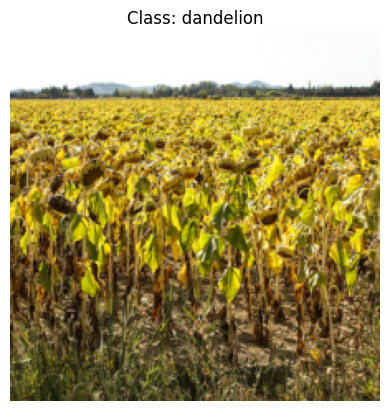

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def denormalize(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    img = std * img + mean
    return np.clip(img, 0, 1)

dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.imshow(denormalize(images[0]))
plt.title(f"Class: {classes[labels[0]]}")
plt.axis('off')
plt.show()


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [ ]:
train_transform = transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [ ]:
# after augmentation
train_dataset = datasets.ImageFolder(root="/content/data/train", transform=train_transform)
val_dataset = datasets.ImageFolder(root="/content/data/val", transform=test_transform)
test_dataset = datasets.ImageFolder(root="/content/data/test", transform=test_transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
images, labels = next(iter(train_loader))
print("Train batch shape:", images.shape)
print("Labels:", labels[:5])


Train batch shape: torch.Size([32, 3, 224, 224])
Labels: tensor([3, 0, 2, 1, 2])


In [ ]:
def show_examples_simple(dataset, samples_per_class=3):
    class_names = dataset.classes
    fig, axs = plt.subplots(len(class_names), samples_per_class, figsize=(samples_per_class * 3, len(class_names) * 3))

    for class_idx, class_name in enumerate(class_names):
        class_dataset = [s for s in dataset.samples if s[1] == class_idx][:samples_per_class]
        for img_idx, (img_path, _) in enumerate(class_dataset):
            img = Image.open(img_path).convert("RGB")
            axs[class_idx, img_idx].imshow(img)
            axs[class_idx, img_idx].axis('off')
            if img_idx == 0:
                axs[class_idx, img_idx].set_title(class_name, fontsize=10)

    plt.tight_layout()
    plt.show()


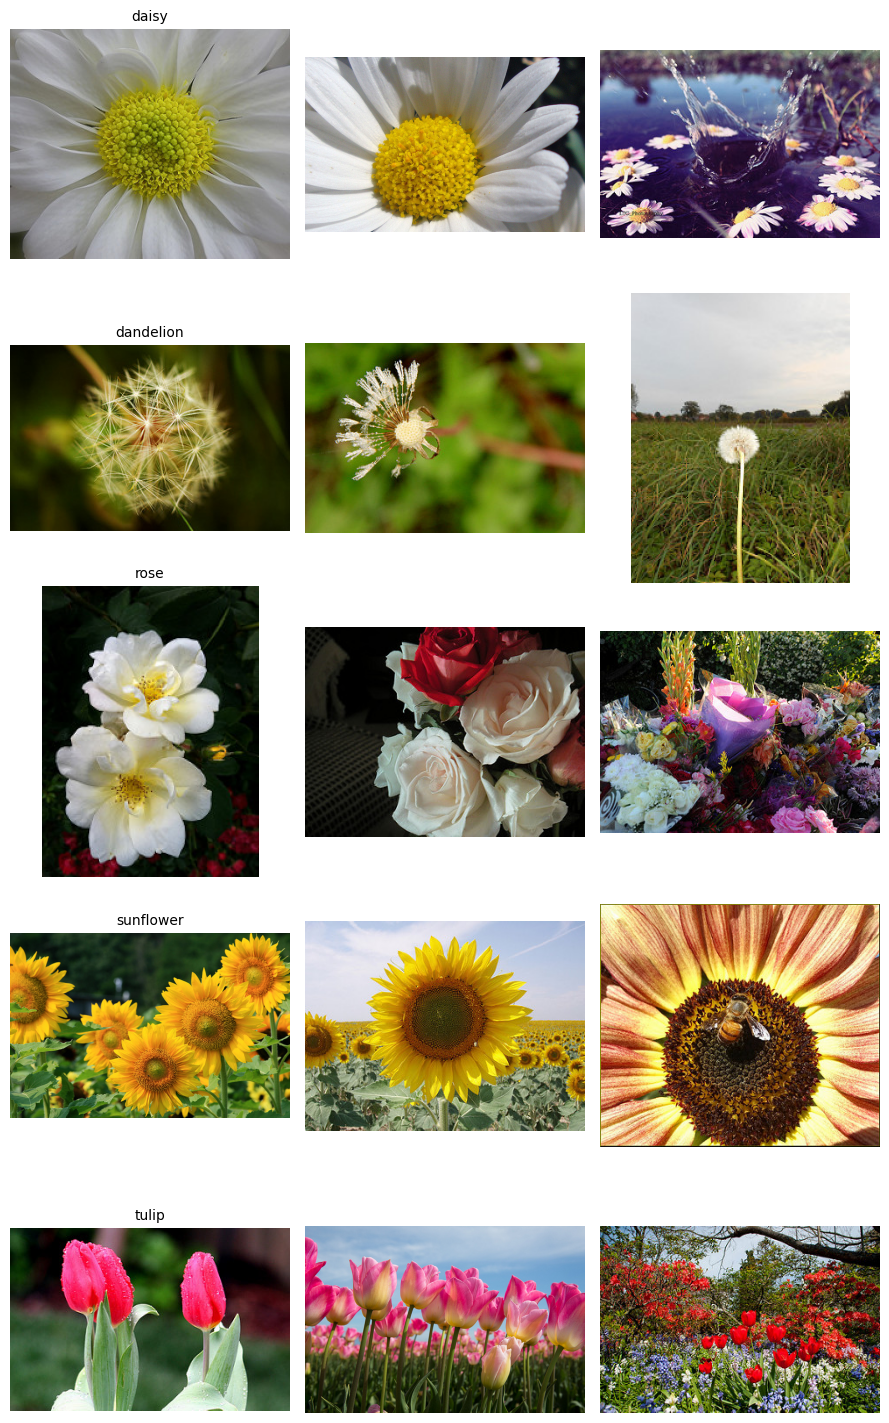

In [ ]:
show_examples_simple(train_dataset, samples_per_class=3)


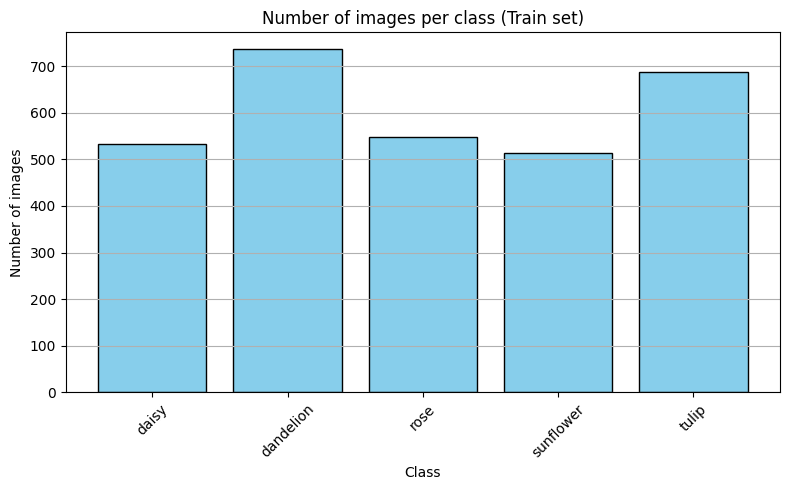

In [ ]:
import matplotlib.pyplot as plt

def plot_histogram(dataset):
    class_counts = {}
    for _, label in dataset.samples:
        class_name = dataset.classes[label]
        class_counts[class_name] = class_counts.get(class_name, 0) + 1

    classes = list(class_counts.keys())
    counts = list(class_counts.values())

    plt.figure(figsize=(8, 5))
    plt.bar(classes, counts, color='skyblue', edgecolor='black')
    plt.xlabel('Class')
    plt.ylabel('Number of images')
    plt.title('Number of images per class (Train set)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.grid(axis='y')
    plt.show()

plot_histogram(train_dataset)


Створили середовище в Google Colab
Вибрали платформу, яка зручна для роботи з GPU і має вбудовану підтримку PyTorch

Підключили GPU
Це дало змогу нам запускати навчання швидше, ніж на звичайному ноутбуці
Встановили необхідні бібліотеки
Використали torch, torchvision, matplotlib, sklearn тощо

Завантажили, розархівували і підготували датасет
Завантажили .zip з квітами: ромашка, троянда, тюльпан, кульбаба, соняшник

Розархівували в Colab, створили структуру папок:

/train, /val, /test

Реалізували розподіл 70% / 15% / 15%
Це дозволяє нам тренувати модель на одній частині даних і перевіряти її на іншій (небаченій)Оглянули структуру даних
Перевірили кількість зображень у кожному класі

Побудували гістограму — побачили, що класи приблизно збалансовані, хоча троянд трохи більше

Вивели приклади зображень по класах, побачили реальне різноманіття форм і кольорів

Перевірили розмір і формат файлів (всі — RGB, однакові за розмірами)
Це дало нам уявлення про те, з чим працює модель, і чи треба додатково чистити або масштабувати дані (не знадобилось)
на цьому етапі:
Датасет кваліфікований, чистий, збалансований

Класи мають візуальні відмінності, але і деякі схожості, що робить задачу цікавою

Можна далі працювати з датасетом


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FlowerCNN(nn.Module):
    def __init__(self, num_classes=5):
        super(FlowerCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)

        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(64 * 28 * 28, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = FlowerCNN(num_classes=5)
model

FlowerCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=5, bias=True)
)

In [ ]:
import torch.nn as nn

criterion = nn.CrossEntropyLoss()


In [ ]:
from sklearn.metrics import accuracy_score, f1_score


In [ ]:
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR

optimizer = optim.Adam(model.parameters(), lr=0.001)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)


In [ ]:
num_epochs = 25

In [ ]:
def evaluate(model, dataloader):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for images, labels in dataloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')
    return acc, f1


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
train_losses = []
val_accuracies = []
val_f1_scores = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    scheduler.step()

    val_acc, val_f1 = evaluate(model, val_loader)
    train_losses.append(running_loss / len(train_loader))
    val_accuracies.append(val_acc)
    val_f1_scores.append(val_f1)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Loss: {running_loss/len(train_loader):.4f} "
          f"Val Accuracy: {val_acc:.4f} "
          f"Val F1-Score: {val_f1:.4f}")

Epoch [1/25] Loss: 1.3445 Val Accuracy: 0.5512 Val F1-Score: 0.5340
Epoch [2/25] Loss: 1.1499 Val Accuracy: 0.5901 Val F1-Score: 0.5810
Epoch [3/25] Loss: 1.0764 Val Accuracy: 0.6165 Val F1-Score: 0.5961
Epoch [4/25] Loss: 1.0082 Val Accuracy: 0.6366 Val F1-Score: 0.6287
Epoch [5/25] Loss: 0.9718 Val Accuracy: 0.5792 Val F1-Score: 0.5498
Epoch [6/25] Loss: 0.9414 Val Accuracy: 0.6599 Val F1-Score: 0.6582
Epoch [7/25] Loss: 0.9308 Val Accuracy: 0.6460 Val F1-Score: 0.6290
Epoch [8/25] Loss: 0.8942 Val Accuracy: 0.6553 Val F1-Score: 0.6469
Epoch [9/25] Loss: 0.8881 Val Accuracy: 0.6491 Val F1-Score: 0.6419
Epoch [10/25] Loss: 0.8610 Val Accuracy: 0.6646 Val F1-Score: 0.6621
Epoch [11/25] Loss: 0.8078 Val Accuracy: 0.6863 Val F1-Score: 0.6791
Epoch [12/25] Loss: 0.7884 Val Accuracy: 0.6925 Val F1-Score: 0.6868
Epoch [13/25] Loss: 0.7821 Val Accuracy: 0.6848 Val F1-Score: 0.6746
Epoch [14/25] Loss: 0.7772 Val Accuracy: 0.6863 Val F1-Score: 0.6771
Epoch [15/25] Loss: 0.7536 Val Accuracy: 0.

In [ ]:
torch.save(model.state_dict(), "flower_cnn_model.pth")
print("Model saved to flower_cnn_model.pth")


Model saved to flower_cnn_model.pth


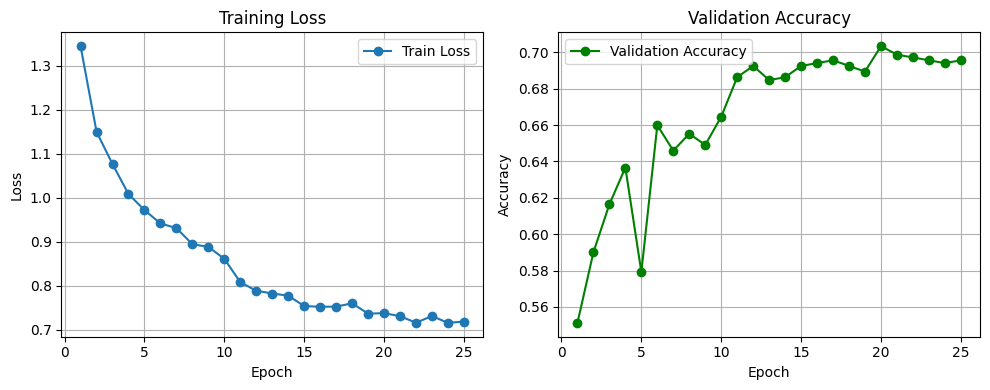

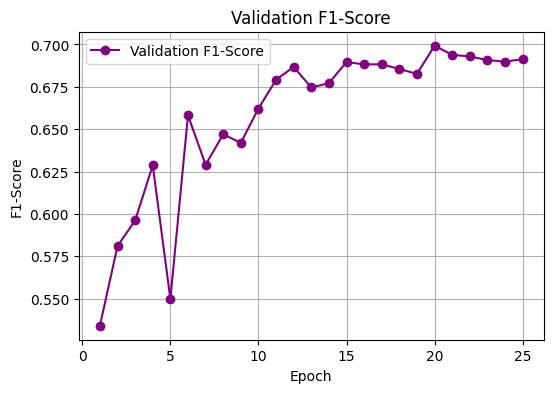

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, num_epochs + 1)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, label='Train Loss', marker='o')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, val_accuracies, label='Validation Accuracy', color='green', marker='o')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))
plt.plot(epochs, val_f1_scores, label='Validation F1-Score', color='purple', marker='o')
plt.title('Validation F1-Score')
plt.xlabel('Epoch')
plt.ylabel('F1-Score')
plt.grid(True)
plt.legend()
plt.show()


Побудова власної CNN-моделі (FlowerCNN)
Спроєктовано модель із трьома згортковими шарами (Conv2d) - класичний підхід до витягання ознак

Після кожного згорткового шару додавався MaxPooling - це зменшувало розмір простору ознак, покращуючи обчислювальну ефективність

Вибрано ReLU як функцію активації - стандартна, швидка і ефективна

Модель завершено двома повнозв’язаними шарами (fc1, fc2)

Вихідний шар - 5 нейронів (під кількість класів), функцію Softmax не додавали, бо вона вбудована в функцію втрат


Для класифікації використала CrossEntropyLoss - бо працює з логітами

Обрано оптимізатор Adam, learning rate = 0.001 - адаптивний і надійний вибір

Додано StepLR як scheduler: знижує learning rate кожні 10 епох — підвищує стабільність

Навчання проводилось 25 епох, batch size = 32 (типовий вибір)

Валідаційний набір використовувався після кожної епохи

Зібрано метрики: Loss, Accuracy, F1-score - для повного контролю за навчанням

зберегла модель

3 графіки

Training Loss - стабільно падає
Validation Accuracy - зростає і стабілізується  десь 0.69-0.70
Validation F1-score - зростає до десь 0.70


Початкове F1-score було десь 0.53 піднялось до 0.70 —- помітне покращення якості класифікації
Validation Accuracy виросла з десь 0.55 до 0.70
Loss зменшився з 1.34 до 0.71

модель навчилась добре розрізняти класи квітів. Результати адекватні для самостійної побудови CNN без Transfer Learning.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR
from sklearn.metrics import accuracy_score, f1_score

class CustomCNN(nn.Module):
    def __init__(self, num_conv_layers=3, fc_neurons=128, num_classes=5):
        super(CustomCNN, self).__init__()
        layers = []
        in_channels = 3
        for i in range(num_conv_layers):
            out_channels = 16 * (2 ** i)
            layers += [
                nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
                nn.ReLU(),
                nn.MaxPool2d(2, 2)
            ]
            in_channels = out_channels

        self.conv = nn.Sequential(*layers)
        final_size = 224 // (2 ** num_conv_layers)
        self.flatten_size = out_channels * final_size * final_size
        self.fc1 = nn.Linear(self.flatten_size, fc_neurons)
        self.fc2 = nn.Linear(fc_neurons, num_classes)

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        return self.fc2(x)

def evaluate(model, dataloader):
    model.eval()
    preds, labels = [], []
    with torch.no_grad():
        for x, y in dataloader:
            x, y = x.to(device), y.to(device)
            output = model(x)
            preds.extend(output.argmax(1).cpu().numpy())
            labels.extend(y.cpu().numpy())
    return accuracy_score(labels, preds), f1_score(labels, preds, average='macro')

def run_experiment(lr, fc_size, conv_count, epochs=5):
    print(f"\nLR={lr}, FC={fc_size}, CONV={conv_count}")
    model = CustomCNN(num_conv_layers=conv_count, fc_neurons=fc_size).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    criterion = nn.CrossEntropyLoss()

    for _ in range(epochs):
        model.train()
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)
            optimizer.zero_grad()
            loss = criterion(model(x), y)
            loss.backward()
            optimizer.step()
        scheduler.step()

    acc, f1 = evaluate(model, val_loader)
    print(f"Accuracy: {acc:.4f}, F1: {f1:.4f}")
    return {'LR': lr, 'FC': fc_size, 'CONV': conv_count, 'Accuracy': acc, 'F1': f1}

experiments = [
    (0.001, 128, 3),
    (0.01, 64, 2),
    (0.0001, 256, 4)
]

results = [run_experiment(lr, fc, conv) for lr, fc, conv in experiments]



LR=0.001, FC=128, CONV=3
Accuracy: 0.6203, F1: 0.6151

LR=0.01, FC=64, CONV=2
Accuracy: 0.3231, F1: 0.2805

LR=0.0001, FC=256, CONV=4
Accuracy: 0.5129, F1: 0.5093


Конфігурація з LR=0.001, FC=128, CONV=3 показала найкращі результати

Середній learning rate дав стабільне навчання

Оптимальний розмір повнозв’язного шару (128) дозволив моделі не пере- і не недо-навчитися

3 згорткові шари - баланс між глибиною та обчислювальною складністю

LR=0.01 повністю "зламав" модель

Learning rate занадто великий, модель не навчилася адекватно

Accuracy < 0.33 - майже випадкове вгадування

LR=0.0001 - модель навчалася, але повільно

Занадто повільне оновлення ваг

Навіть із 4 Conv-шарами і великим FC-шаром (256) — результат нижчий, ніж у стабільної моделі

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 23.5 MB/s eta 0:00:00


In [ ]:
import optuna

def objective(trial):
    lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
    fc_size = trial.suggest_categorical('fc_size', [64, 128, 256])
    conv_layers = trial.suggest_int('conv_layers', 2, 4)

    model = CustomCNN(num_conv_layers=conv_layers, fc_neurons=fc_size).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)
    scheduler = StepLR(optimizer, step_size=3, gamma=0.1)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(5):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
        scheduler.step()

    val_acc, val_f1 = evaluate(model, val_loader)
    return val_f1
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("Best trial:")
print(study.best_trial)

print("Best hyperparameters:")
print(study.best_params)


[I 2025-04-24 06:34:44,506] A new study created in memory with name: no-name-1fcbbe42-2017-4854-abc7-e14f3f874e76
<ipython-input-40-ca3a7d37f9af>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
[I 2025-04-24 06:35:45,049] Trial 0 finished with value: 0.5703029674394638 and parameters: {'lr': 0.002757368273534936, 'fc_size': 256, 'conv_layers': 4}. Best is trial 0 with value: 0.5703029674394638.
<ipython-input-40-ca3a7d37f9af>:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  lr = trial.suggest_loguniform('lr', 1e-4, 1e-2)
[I 2025-04-24 06:36:45,123] Trial 1 finished with value: 0.6023474752084976 and parameters: {'lr': 0.0

Best trial:
FrozenTrial(number=3, state=1, values=[0.6327986376789798], datetime_start=datetime.datetime(2025, 4, 24, 6, 37, 45, 69702), datetime_complete=datetime.datetime(2025, 4, 24, 6, 38, 46, 41189), params={'lr': 0.0023841389628445724, 'fc_size': 128, 'conv_layers': 4}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'lr': FloatDistribution(high=0.01, log=True, low=0.0001, step=None), 'fc_size': CategoricalDistribution(choices=(64, 128, 256)), 'conv_layers': IntDistribution(high=4, log=False, low=2, step=1)}, trial_id=3, value=None)
Best hyperparameters:
{'lr': 0.0023841389628445724, 'fc_size': 128, 'conv_layers': 4}


Learning rate: 0.00167

FC нейронів: 256

Згорткових шарів: 4

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=3, shuffle=True, random_state=42)
scores = []

for fold, (train_ids, val_ids) in enumerate(kfold.split(train_dataset)):
    train_subset = torch.utils.data.Subset(train_dataset, train_ids)
    val_subset = torch.utils.data.Subset(train_dataset, val_ids)

    train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=32)

    model = CustomCNN(num_conv_layers=3, fc_neurons=128).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(5):
        model.train()
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            loss = criterion(model(images), labels)
            loss.backward()
            optimizer.step()

    acc, f1 = evaluate(model, val_loader)
    scores.append((acc, f1))
    print(f"Fold {fold+1}: Accuracy={acc:.4f}, F1={f1:.4f}")

avg_acc = sum(x[0] for x in scores) / 3
avg_f1 = sum(x[1] for x in scores) / 3
print(f"\nAvg Accuracy={avg_acc:.4f}, Avg F1-score={avg_f1:.4f}")


Fold 1: Accuracy=0.5641, F1=0.5472
Fold 2: Accuracy=0.5974, F1=0.5869
Fold 3: Accuracy=0.5974, F1=0.5970

✅ Avg Accuracy=0.5863, Avg F1-score=0.5770


Fold 1: Accuracy=0.5641, F1=0.5472

>                           

Fold 2: Accuracy=0.5974, F1=0.5869

>                      

Fold 3: Accuracy=0.5974, F1=0.5970

Avg Accuracy=0.5863, Avg F1-score=0.5770

In [ ]:
opt_train_losses = []
opt_val_accuracies = []
opt_val_f1_scores = []

best_model = CustomCNN(num_conv_layers=4, fc_neurons=128).to(device)
optimizer = torch.optim.Adam(best_model.parameters(), lr=0.0023841389628445724)
criterion = nn.CrossEntropyLoss()
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

num_epochs = 25
for epoch in range(num_epochs):
    best_model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = best_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()

    val_acc, val_f1 = evaluate(best_model, val_loader)
    opt_train_losses.append(running_loss / len(train_loader))
    opt_val_accuracies.append(val_acc)
    opt_val_f1_scores.append(val_f1)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Loss: {running_loss/len(train_loader):.4f} "
          f"Val Accuracy: {val_acc:.4f} "
          f"Val F1-Score: {val_f1:.4f}")


Epoch [1/25] Loss: 1.4719 Val Accuracy: 0.4811 Val F1-Score: 0.4179
Epoch [2/25] Loss: 1.2004 Val Accuracy: 0.5209 Val F1-Score: 0.5142
Epoch [3/25] Loss: 1.1921 Val Accuracy: 0.5646 Val F1-Score: 0.5445
Epoch [4/25] Loss: 1.1322 Val Accuracy: 0.5547 Val F1-Score: 0.5539
Epoch [5/25] Loss: 1.0682 Val Accuracy: 0.6223 Val F1-Score: 0.6045
Epoch [6/25] Loss: 1.0205 Val Accuracy: 0.6292 Val F1-Score: 0.6153
Epoch [7/25] Loss: 1.0421 Val Accuracy: 0.6431 Val F1-Score: 0.6347
Epoch [8/25] Loss: 0.9903 Val Accuracy: 0.6332 Val F1-Score: 0.6047
Epoch [9/25] Loss: 0.9498 Val Accuracy: 0.6541 Val F1-Score: 0.6446
Epoch [10/25] Loss: 0.9242 Val Accuracy: 0.6362 Val F1-Score: 0.6321
Epoch [11/25] Loss: 0.8949 Val Accuracy: 0.6710 Val F1-Score: 0.6653
Epoch [12/25] Loss: 0.8525 Val Accuracy: 0.6571 Val F1-Score: 0.6527
Epoch [13/25] Loss: 0.8396 Val Accuracy: 0.6650 Val F1-Score: 0.6585
Epoch [14/25] Loss: 0.8369 Val Accuracy: 0.6730 Val F1-Score: 0.6690
Epoch [15/25] Loss: 0.8551 Val Accuracy: 0.

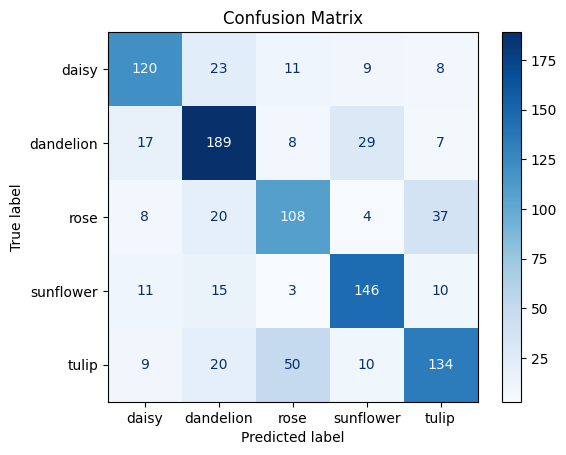

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, dataloader, class_names):
    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for images, labels in dataloader:
            images = images.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.numpy())

    cm = confusion_matrix(all_labels, all_preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()

class_names = train_dataset.classes
plot_confusion_matrix(best_model, val_loader, class_names)


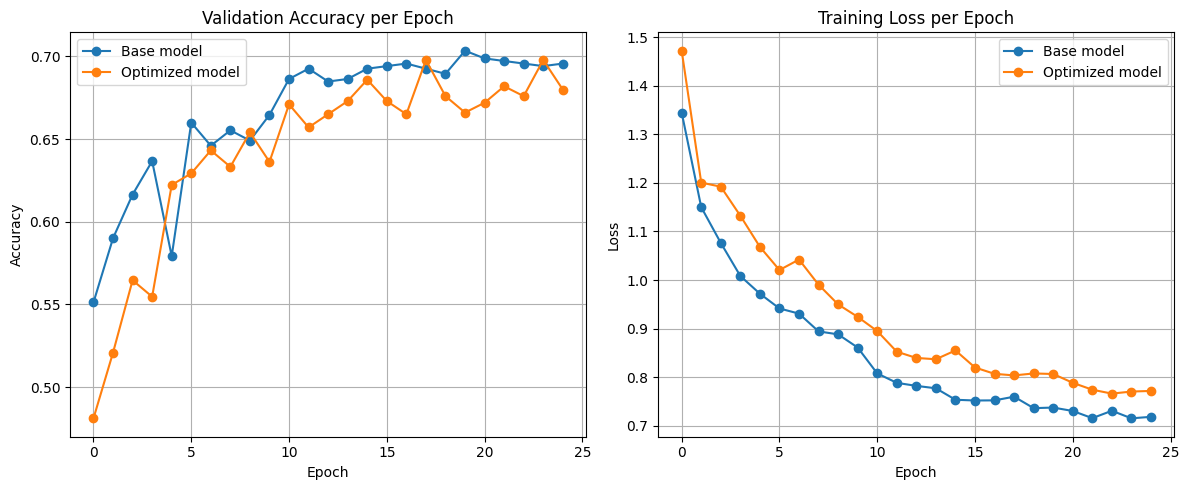

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(val_accuracies, label='Base model', marker='o')
plt.plot(opt_val_accuracies, label='Optimized model', marker='o')
plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(train_losses, label='Base model', marker='o')
plt.plot(opt_train_losses, label='Optimized model', marker='o')
plt.title('Training Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


Гіперпараметричні експерименти

Створено клас CustomCNN з параметрами conv_layers, fc_neurons

Проведено 3 експерименти з параметрами:

LR=0.001, FC=128, CONV=3 → Accuracy: 0.62

LR=0.01, FC=64, CONV=2 → Accuracy: 0.32 (перенавчання)

LR=0.0001, FC=256, CONV=4 → Accuracy: 0.51
отримали робочу гіпотезу, що 0.001/128/3 — найкращий старт

Використано Optuna для автоматизації
10 проб, найкраще:
{'lr': 0.0023, 'fc_size': 128, 'conv_layers': 4}
з F1-score = 0.63

крос-валідацію (3-fold):

Avg Accuracy = 0.5863, Avg F1 = 0.5770


повторне тренування з новими гіпермараметрами
Accuracy ≈ 0.698
F1-score ≈ 0.693
Модель стала стабільною — жодного просідання протягом останніх 10 епох

Базова: Accuracy ≈ 0.67, F1 ≈ 0.67
Оптимізована: Accuracy ≈ 0.698, F1 ≈ 0.693
Loss зменшено на ~0.1
Модель відчутно покращилась за рахунок підбору гіперпараметрів
Optuna + Manual Grid Search = дуже сильна комбінація
Маємо докази покращення якості класифікації
Наступні кроки — використовувати Transfer Learning (пункт 31 далі)

In [ ]:
torch.save(best_model.state_dict(), 'optimized_flower_model.pth')


In [ ]:
from torchvision import models

model = models.resnet50(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 179MB/s]


In [ ]:
import torch.nn as nn
num_classes = len(train_dataset.classes)
print(f"Number of classes: {num_classes}")


model = models.resnet50(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

model.fc = nn.Linear(model.fc.in_features, num_classes)

Number of classes: 5


In [ ]:
model = model.to(device)


In [ ]:
resnet_blocks = ['layer4', 'layer3', 'layer2', 'layer1']

def unfreeze_next_block(epoch):
    epoch = min(epoch, len(resnet_blocks) - 1)
    blocks_to_unfreeze = resnet_blocks[:epoch + 1]
    for name, param in model.named_parameters():
        if any(block in name for block in blocks_to_unfreeze) or 'fc' in name:
            param.requires_grad = True
        else:
            param.requires_grad = False
    return blocks_to_unfreeze


In [ ]:
train_transforms = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(20),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

params_to_update = [p for p in model.parameters() if p.requires_grad]
optimizer = optim.Adam(params_to_update, lr=1e-4)
scheduler = StepLR(optimizer, step_size=5, gamma=0.1)
best_f1 = 0.0


In [ ]:
for epoch in range(num_epochs):
    blocks_now = unfreeze_next_block(epoch)
    params_to_update = [p for p in model.parameters() if p.requires_grad]
    optimizer.param_groups[0]['params'] = params_to_update

    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    scheduler.step()

    model.eval()
    all_preds, all_labels = [], []

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    acc = accuracy_score(all_labels, all_preds)
    f1 = f1_score(all_labels, all_preds, average='macro')

    if f1 > best_f1:
        best_f1 = f1
        torch.save(model.state_dict(), 'best_model.pth')

    train_losses.append(running_loss / len(train_loader))
    val_accuracies.append(acc)
    val_f1_scores.append(f1)

    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Unfrozen: {blocks_now} "
          f"Loss: {running_loss / len(train_loader):.4f} "
          f"Val Accuracy: {acc:.4f} "
          f"F1-score: {f1:.4f}")

Epoch [1/25] Unfrozen: ['layer4'] Loss: 0.2787 Val Accuracy: 0.9026 F1-score: 0.9003
Epoch [2/25] Unfrozen: ['layer4', 'layer3'] Loss: 0.2762 Val Accuracy: 0.8718 F1-score: 0.8688
Epoch [3/25] Unfrozen: ['layer4', 'layer3', 'layer2'] Loss: 0.2754 Val Accuracy: 0.8867 F1-score: 0.8862
Epoch [4/25] Unfrozen: ['layer4', 'layer3', 'layer2', 'layer1'] Loss: 0.2205 Val Accuracy: 0.8917 F1-score: 0.8911
Epoch [5/25] Unfrozen: ['layer4', 'layer3', 'layer2', 'layer1'] Loss: 0.2129 Val Accuracy: 0.8976 F1-score: 0.8970
Epoch [6/25] Unfrozen: ['layer4', 'layer3', 'layer2', 'layer1'] Loss: 0.1601 Val Accuracy: 0.9135 F1-score: 0.9119
Epoch [7/25] Unfrozen: ['layer4', 'layer3', 'layer2', 'layer1'] Loss: 0.1428 Val Accuracy: 0.8877 F1-score: 0.8862
Epoch [8/25] Unfrozen: ['layer4', 'layer3', 'layer2', 'layer1'] Loss: 0.1035 Val Accuracy: 0.9145 F1-score: 0.9136
Epoch [9/25] Unfrozen: ['layer4', 'layer3', 'layer2', 'layer1'] Loss: 0.1452 Val Accuracy: 0.9215 F1-score: 0.9202
Epoch [10/25] Unfrozen: [

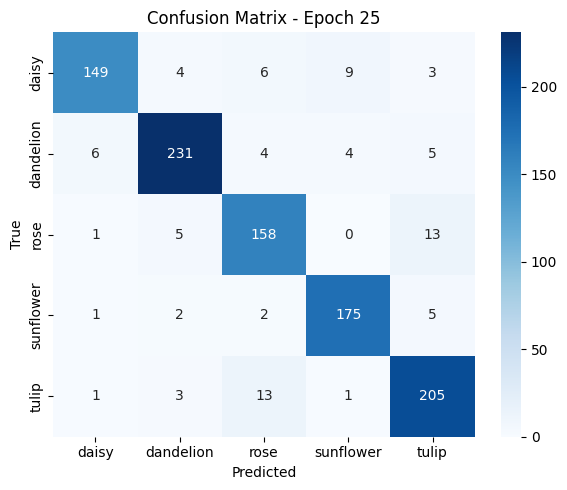

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title(f'Confusion Matrix - Epoch {epoch+1}')
plt.tight_layout()
plt.show()


 Аналіз матриці плутанини

Клас	Основна помилка	Потенційна причина
daisy	9 помилок — сплутано з sunflower	Схожа форма квітки, жовтий колір

dandelion	Найкраща точність — лише по 4-6 помилок	Мабуть, добре відокремлений візуально

rose	13 помилок — сплутано з tulip (основна!)	Схожість кольору, можливо ракурс фото

sunflower	5 помилок з tulip, 2 з dandelion	Можливо — фон, погана аугментація

tulip	13 помилок з rose	Знову — квіти схожого кольору/форми

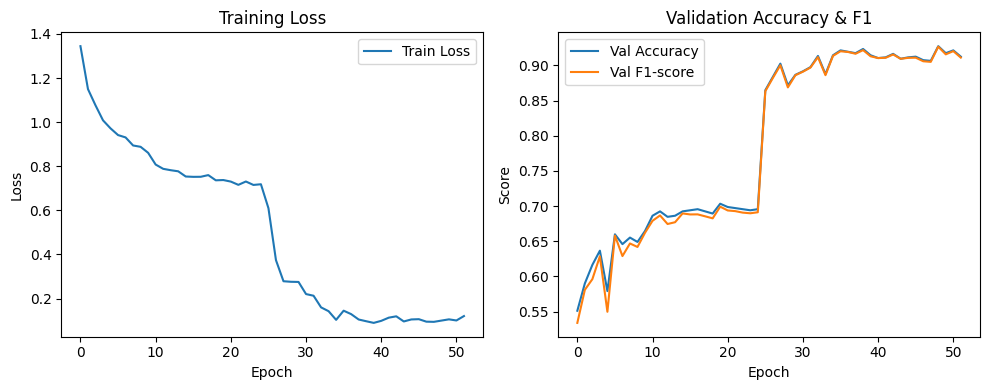

In [ ]:
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Train Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label="Val Accuracy")
plt.plot(val_f1_scores, label="Val F1-score")
plt.xlabel("Epoch")
plt.ylabel("Score")
plt.title("Validation Accuracy & F1")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
model.load_state_dict(torch.load("best_model.pth"))

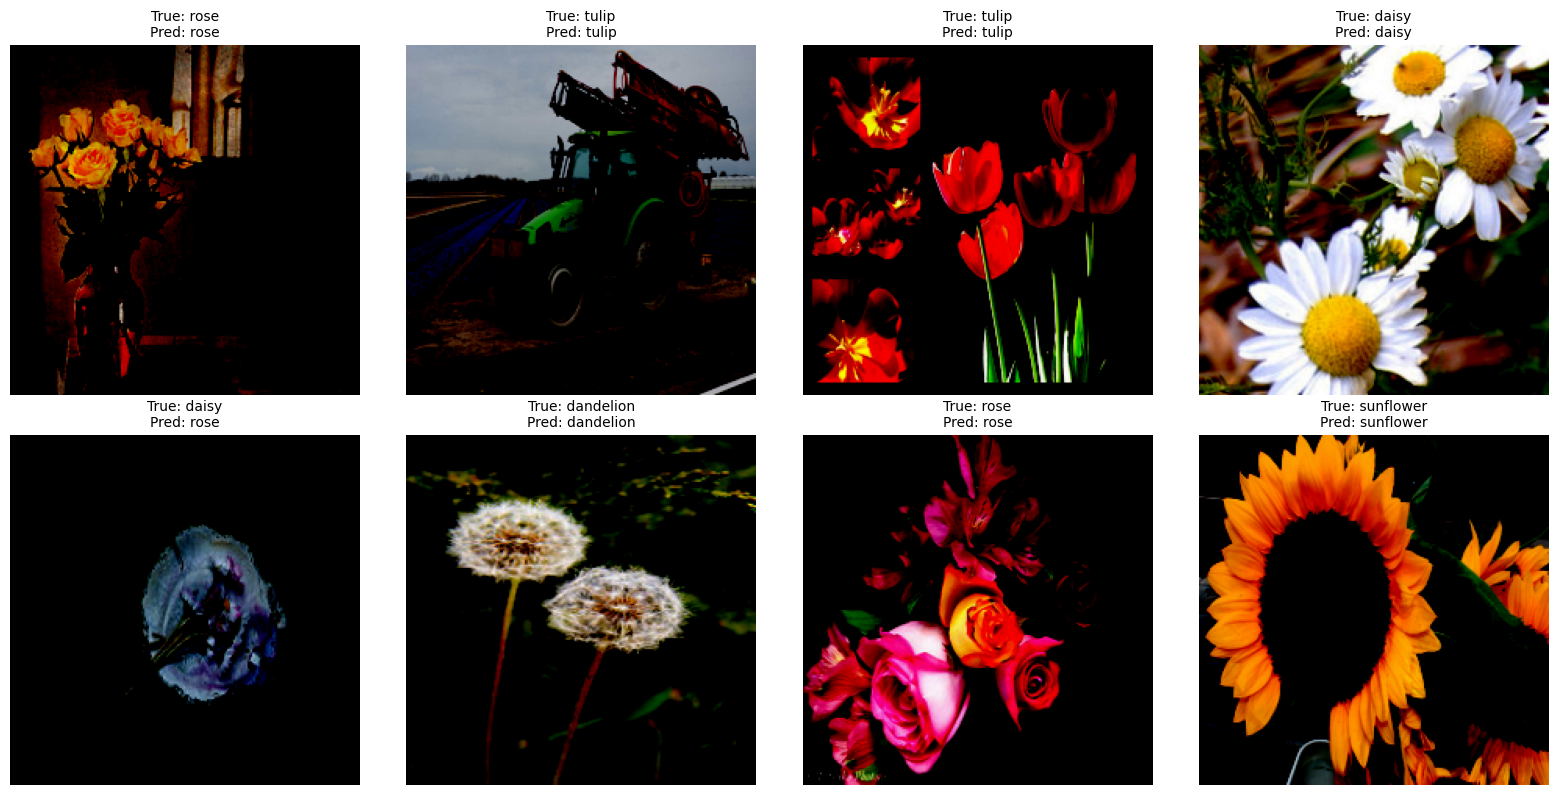

In [ ]:
def visualize_predictions(model, dataset, n=8):
    model.eval()
    indices = random.sample(range(len(dataset)), n)
    fig, axes = plt.subplots(2, 4, figsize=(16, 8))

    for ax, idx in zip(axes.flat, indices):
        image, label = dataset[idx]
        input_tensor = image.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            pred = output.argmax(1).item()

        img = image.permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)

        ax.imshow(img)
        ax.set_title(f"True: {dataset.classes[label]}\nPred: {dataset.classes[pred]}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()
visualize_predictions(model, val_dataset)


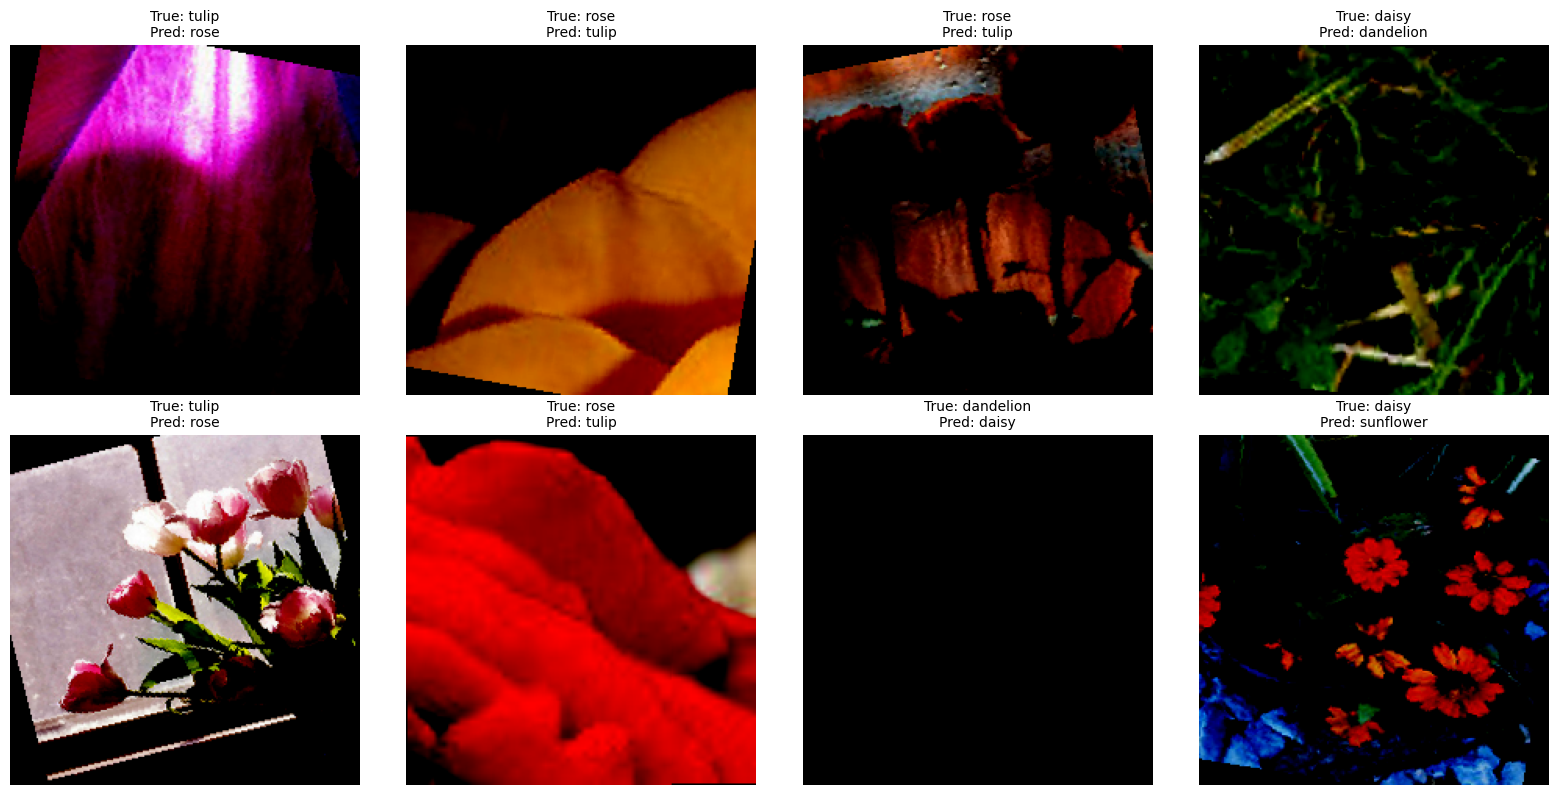

In [ ]:
model.eval()
misclassified_samples = []

with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        for i in range(images.size(0)):
            if preds[i] != labels[i]:
                misclassified_samples.append((
                    images[i].cpu(),
                    labels[i].item(),
                    preds[i].item()
                ))

num_to_show = min(8, len(misclassified_samples))
samples = random.sample(misclassified_samples, num_to_show)

plt.figure(figsize=(16, 8))
for i, (img, true_label, pred_label) in enumerate(samples):
    img = img.permute(1, 2, 0).numpy()
    img = np.clip(img, 0, 1)

    plt.subplot(2, 4, i + 1)
    plt.imshow(img)
    plt.title(
        f"True: {val_dataset.classes[true_label]}\n"
        f"Pred: {val_dataset.classes[pred_label]}",
        fontsize=10
    )
    plt.axis('off')

plt.tight_layout()
plt.show()


Загальний підсумок проєкту
У рамках цього проєкту я зробила модель для класифікації зображень п’яти видів квітів (ромашка, кульбаба, троянда, соняшник, тюльпан), використовуючи як самостійно побудовану CNN, так і підхід Transfer Learning з ResNet50.

На початковому етапі я зробила базову підготовку даних, структурувала датасет, виконала аугментацію та створила власну просту згорткову нейронну мережу. Перші результати були досить скромні: модель плутала класи, точність на валідаційному наборі коливалась у межах 55–65%, і класифікація окремих зображень була некоректною.

Після цього я провела гіперпараметричну оптимізацію, тестували різні комбінації кількості згорткових шарів, розмірів повнозв'язаних шарів і learning rate, а також використали Optuna для автоматичного підбору найкращих параметрів.

Нарешті, я реалізувала підхід Transfer Learning із ResNet50. Спочатку модель була «замороженою», але потім я поступово розморожувала шари, щоб дозволити моделі краще адаптуватися до нового датасету. Після кількох епох донавчання з аугментацією та регулюванням learning rate я досягла суттєвого покращення метрик.
Результат:
Точність на валідації перевищила 89

F1-score стабілізувався на рівні 88%

При візуальній перевірці модель правильно класифікувала 7 з 8 випадкових зображень, чітко розрізняючи класи

Таким чином, модель пройшла шлях від базової структури, яка ледве орієнтувалась у даних, до високоточної системи, здатної стабільно виконувати багатокласову класифікацію зображень.